In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
from deap import base,creator,tools

In [3]:
Induvidual_Length = 100

In [4]:
def FitnessFunction(individual):
  return sum(individual),

In [5]:
creator.create("Fitness", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.Fitness)

In [6]:
toolbox = base.Toolbox()
toolbox.register("zeroOrOne", random.randint, 0, 1)
toolbox.zeroOrOne()

0

In [7]:
toolbox.register("individualGenerator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, Induvidual_Length)
toolbox.individualGenerator()

[1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0]

In [8]:
toolbox.register("populationGenerator", tools.initRepeat, list, toolbox.individualGenerator)
toolbox.populationGenerator(4)

[[0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1],
 [0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1]

In [9]:
toolbox.register("evaluate", FitnessFunction)
toolbox.evaluate([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

(5,)

In [10]:
toolbox.register("select", tools.selTournament, tournsize=3)

In [11]:
generation = 0
generationMaxFitness = []
generationMeanFitness = []

In [12]:
population = toolbox.populationGenerator(100)
fitnessValues = list(map(toolbox.evaluate, population))
fitnessValues

[(52,),
 (46,),
 (52,),
 (48,),
 (49,),
 (53,),
 (53,),
 (46,),
 (51,),
 (47,),
 (46,),
 (47,),
 (56,),
 (55,),
 (44,),
 (51,),
 (51,),
 (45,),
 (56,),
 (51,),
 (45,),
 (51,),
 (52,),
 (48,),
 (47,),
 (42,),
 (51,),
 (51,),
 (54,),
 (54,),
 (50,),
 (47,),
 (46,),
 (46,),
 (61,),
 (50,),
 (36,),
 (47,),
 (49,),
 (49,),
 (53,),
 (44,),
 (52,),
 (47,),
 (53,),
 (46,),
 (56,),
 (49,),
 (51,),
 (55,),
 (55,),
 (50,),
 (51,),
 (51,),
 (45,),
 (48,),
 (51,),
 (46,),
 (58,),
 (57,),
 (41,),
 (44,),
 (47,),
 (44,),
 (46,),
 (51,),
 (47,),
 (52,),
 (51,),
 (54,),
 (51,),
 (45,),
 (53,),
 (50,),
 (49,),
 (49,),
 (49,),
 (48,),
 (43,),
 (48,),
 (56,),
 (57,),
 (50,),
 (52,),
 (57,),
 (49,),
 (59,),
 (49,),
 (52,),
 (44,),
 (54,),
 (51,),
 (58,),
 (50,),
 (56,),
 (42,),
 (48,),
 (51,),
 (49,),
 (42,)]

In [13]:
for individual, fitnessValue in zip(population, fitnessValues):
    individual.fitness.values = fitnessValue
fitnessValues = [individual.fitness.values[0] for individual in population]
fitnessValues

[52.0,
 46.0,
 52.0,
 48.0,
 49.0,
 53.0,
 53.0,
 46.0,
 51.0,
 47.0,
 46.0,
 47.0,
 56.0,
 55.0,
 44.0,
 51.0,
 51.0,
 45.0,
 56.0,
 51.0,
 45.0,
 51.0,
 52.0,
 48.0,
 47.0,
 42.0,
 51.0,
 51.0,
 54.0,
 54.0,
 50.0,
 47.0,
 46.0,
 46.0,
 61.0,
 50.0,
 36.0,
 47.0,
 49.0,
 49.0,
 53.0,
 44.0,
 52.0,
 47.0,
 53.0,
 46.0,
 56.0,
 49.0,
 51.0,
 55.0,
 55.0,
 50.0,
 51.0,
 51.0,
 45.0,
 48.0,
 51.0,
 46.0,
 58.0,
 57.0,
 41.0,
 44.0,
 47.0,
 44.0,
 46.0,
 51.0,
 47.0,
 52.0,
 51.0,
 54.0,
 51.0,
 45.0,
 53.0,
 50.0,
 49.0,
 49.0,
 49.0,
 48.0,
 43.0,
 48.0,
 56.0,
 57.0,
 50.0,
 52.0,
 57.0,
 49.0,
 59.0,
 49.0,
 52.0,
 44.0,
 54.0,
 51.0,
 58.0,
 50.0,
 56.0,
 42.0,
 48.0,
 51.0,
 49.0,
 42.0]

In [14]:
toolbox.register("Crossover", tools.cxOnePoint)

In [15]:
while(max(fitnessValues) < Induvidual_Length and generation < 500):
    generation = generation + 1
    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))
    
    for i, j in zip(offspring[::2], offspring[1::2]):
        if random.random() < 0.5:
            toolbox.Crossover(i, j)
            del i.fitness.values
            del j.fitness.values
        
    newIndividuals = [i for i in offspring if not i.fitness.valid]
    newFitnessValues = list(map(toolbox.evaluate, newIndividuals))
        
    for individual, fitnessValue in zip(newIndividuals, newFitnessValues):
        individual.fitness.values = fitnessValue
    population[:] = offspring
    fitnessValues = [i.fitness.values[0] for i in population]

    maximum = max(fitnessValues)
    mean = sum(fitnessValues) / len(population)
    generationMaxFitness.append(maximum)
    generationMeanFitness.append(mean)
    print("Generation {}: Max Fitness = {}, Avg Fitness = {}".format(generation, maximum, mean))

Generation 1: Max Fitness = 61.0, Avg Fitness = 52.87
Generation 2: Max Fitness = 63.0, Avg Fitness = 55.64
Generation 3: Max Fitness = 63.0, Avg Fitness = 58.51
Generation 4: Max Fitness = 64.0, Avg Fitness = 60.4
Generation 5: Max Fitness = 67.0, Avg Fitness = 62.07
Generation 6: Max Fitness = 70.0, Avg Fitness = 63.76
Generation 7: Max Fitness = 70.0, Avg Fitness = 65.65
Generation 8: Max Fitness = 71.0, Avg Fitness = 67.18
Generation 9: Max Fitness = 73.0, Avg Fitness = 68.73
Generation 10: Max Fitness = 74.0, Avg Fitness = 70.32
Generation 11: Max Fitness = 74.0, Avg Fitness = 71.58
Generation 12: Max Fitness = 75.0, Avg Fitness = 72.82
Generation 13: Max Fitness = 76.0, Avg Fitness = 73.52
Generation 14: Max Fitness = 77.0, Avg Fitness = 74.12
Generation 15: Max Fitness = 78.0, Avg Fitness = 74.93
Generation 16: Max Fitness = 79.0, Avg Fitness = 75.79
Generation 17: Max Fitness = 79.0, Avg Fitness = 76.65
Generation 18: Max Fitness = 80.0, Avg Fitness = 77.47
Generation 19: Max F

Generation 173: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 174: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 175: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 176: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 177: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 178: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 179: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 180: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 181: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 182: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 183: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 184: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 185: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 186: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 187: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 188: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 189: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 190: Max Fitness = 83.0, Avg Fitness = 83.0
Generation

Generation 348: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 349: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 350: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 351: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 352: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 353: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 354: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 355: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 356: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 357: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 358: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 359: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 360: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 361: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 362: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 363: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 364: Max Fitness = 83.0, Avg Fitness = 83.0
Generation 365: Max Fitness = 83.0, Avg Fitness = 83.0
Generation

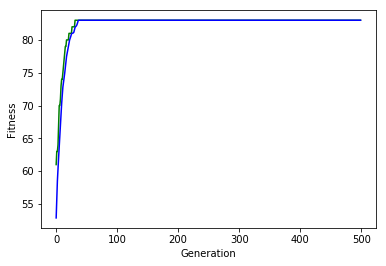

In [16]:
plt.plot(generationMaxFitness, color='Green')
plt.plot(generationMeanFitness, color='Blue')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()